In [109]:
import pandas as pd
import numpy as np

df =  pd.read_csv("../../Output/clusteredTopicsRaw.csv")
df.fillna(1, inplace=True)

for cluster_level in ["level 1", "level 2"]:
    df['log_norm_appearances_' + cluster_level] = df.groupby(cluster_level)[
        'appearances'].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()))
    df['norm_cohesion_' + cluster_level] = df.groupby(cluster_level)[
        'cohesion_' + cluster_level].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()))
    df['norm_separation_' + cluster_level] = df.groupby(cluster_level)[
        'separation_' + cluster_level].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()))
    df['norm_silhouette_' + cluster_level] = df.groupby(cluster_level)[
        'silhouette_' + cluster_level].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()))

df.fillna(1, inplace=True)
PRIMARY_LEVEL = "level 0"
df

,level 0,appearances,level 1,silhouette_level 1,cohesion_level 1,separation_level 1,closest_level 1,level 2,silhouette_level 2,cohesion_level 2,...,separation_level 5,closest_level 5,log_norm_appearances_level 1,norm_cohesion_level 1,norm_separation_level 1,norm_silhouette_level 1,log_norm_appearances_level 2,norm_cohesion_level 2,norm_separation_level 2,norm_silhouette_level 2
0,"""Hello, World!"" program",1,7624,-0.031385,1.108106,1.144011,10550,1523,-0.088450,1.155400,...,1.323235,8,1.000,0.672120,0.041553,1.000000,0.000000,0.687279,0.551358,0.639936
1,"""I AM"" Activity",4,4700,-0.100306,1.028389,1.143043,9015,895,-0.093946,1.072476,...,1.314073,4,0.375,0.479737,1.000000,0.056583,0.166667,0.376003,0.452110,0.388188
2,'Aoa,1,4524,0.170045,0.963280,0.799479,4591,860,0.292896,1.130638,...,1.274623,6,0.000,0.000000,0.241554,0.546098,0.000000,0.604222,0.241554,0.802902
3,'Ilm al-huruf,2,4571,0.050776,1.069693,1.015379,4571,870,0.037981,1.163431,...,1.297575,6,0.250,0.932910,0.596502,0.841452,0.100000,0.785104,0.385094,0.718549
4,'The All-Species Living Tree' Project,3,9361,-0.032463,0.955992,0.988067,6738,1859,0.003635,1.042615,...,1.231899,17,0.400,0.558532,0.104306,1.000000,0.042553,0.441531,0.410383,0.471443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56224,Ḍād,4,2756,0.203653,0.982901,0.782731,2757,568,-0.036609,1.106656,...,1.294746,7,1.000,0.000000,1.000000,0.000000,0.600000,0.714991,0.547972,0.480399
56225,Ḱérberos,3,4437,0.151802,1.035577,0.878375,4443,844,0.092255,1.116407,...,1.285738,3,1.000,0.982594,0.000000,1.000000,1.000000,0.805552,0.393366,0.714277
56226,Ḷḷumés,1,6803,-0.028560,1.030861,1.061168,4243,1358,-0.168385,1.078202,...,1.344378,7,0.000,1.000000,1.000000,1.000000,0.000000,0.207431,0.401158,0.210301
56227,Ṭa (Indic),1,5009,0.119437,1.017986,0.896401,5006,959,0.046426,1.183874,...,1.289295,6,1.000,1.000000,1.000000,1.000000,0.000000,0.985573,0.791002,0.619623


In [110]:
testSet = pd.read_csv("questions.csv")
testSet["overlap 1"] = testSet["choice 1"] == testSet["choice 2"]
testSet["overlap 2"] = testSet["choice 1"] == testSet["choice 3"]
testSet["overlap 3"] = testSet["choice 2"] == testSet["choice 3"]
testSet["overlap 4"] = testSet["overlap 1"] & testSet["overlap 2"] & testSet["overlap 3"]
testSetClean = testSet[testSet["overlap 4"]].copy()

# labeled data
# map cluster_level and cluster from testSetClean to df
# add a column labeled_choice = True
testSetClean.rename(columns={'choice 1': 'level 0'}, inplace=True)
testSetClean1 = testSetClean[testSetClean["cluster_level"] == "level 1"].copy()
testSetClean1.rename(columns={'cluster': 'level 1'}, inplace=True)
testSetClean2 = testSetClean[testSetClean["cluster_level"] == "level 2"].copy()
testSetClean2.rename(columns={'cluster': 'level 2'}, inplace=True)

testSetClean1

,cluster_level,level 1,level 0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,...,topic70,topic71,topic72,choice 2,choice 3,choice 4,overlap 1,overlap 2,overlap 3,overlap 4
1,level 1,7826,Future Investment Initiative Institute,Future Investment Initiative Institute,HOME Investment Partnerships Program,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Future Investment Initiative Institute,Future Investment Initiative Institute,Future Investment Initiative Institute,True,True,True,True
10,level 1,8587,Method of support,Method of support,Support function,Do-support,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Method of support,Method of support,NaN,True,True,True,True
14,level 1,2382,United States antitrust law,History of United States antitrust law,United States antitrust law,High-Tech Employee Antitrust Litigation,Antitrust cases against Google by the European...,NaN,NaN,NaN,...,NaN,NaN,NaN,United States antitrust law,United States antitrust law,NaN,True,True,True,True
19,level 1,182,Toxin,Toxin,Microbial toxin,AB toxin,Toxin and Toxin-Target Database,Botulinum toxin,Polymorphic toxins,NaN,...,NaN,NaN,NaN,Toxin,Toxin,NaN,True,True,True,True
20,level 1,1152,Wastewater,Wastewater,Wastewater treatment,Industrial wastewater treatment,Conventional wastewater treatment,Municipal wastewater treatment energy management,NaN,NaN,...,NaN,NaN,NaN,Wastewater,Wastewater,NaN,True,True,True,True
21,level 1,3059,Precarious work,Precarious work,Coping,The Perseverance,Procrastination,Life Events and Difficulties Schedule,NaN,NaN,...,NaN,NaN,NaN,Precarious work,Precarious work,NaN,True,True,True,True
22,level 1,6714,Category theory,Category theory,Theory of categories,Higher category theory,Limit (category theory),Pullback (category theory),End (category theory),NaN,...,NaN,NaN,NaN,Category theory,Category theory,NaN,True,True,True,True
24,level 1,8503,Logistics,Logistics,International Society of Logistics,Chartered Institute of Logistics and Transport,Logistics engineering,Logistics Support System,Logistics automation,Design for logistics,...,NaN,NaN,NaN,Logistics,Logistics,NaN,True,True,True,True
25,level 1,1133,Hydrological model,Hydrological model,Hydrologic Unit Modeling for the United States,Hydrological transport model,Behavioral modeling in hydrology,NaN,NaN,NaN,...,NaN,NaN,NaN,Hydrological model,Hydrological model,NaN,True,True,True,True
26,level 1,10915,Film genre,Film genre,Film series,Film noir,Sedona Film School,Outsiders (film),NaN,NaN,...,NaN,NaN,NaN,Film genre,Film genre,NaN,True,True,True,True


In [111]:
filtered_df1 = df[df["level 1"].isin(testSetClean1["level 1"])]
merged_df1 = pd.merge(filtered_df1, testSetClean1, on=['level 1', 'level 0'], how='left')

filtered_df2 = df[df["level 2"].isin(testSetClean2["level 2"])]
merged_df2 = pd.merge(filtered_df2, testSetClean2, on=['level 2', 'level 0'], how='left')

In [112]:
def calcAccuracyForLevel(df, cluster_level, config=[0, 0, 0, 0]):
    # Calculate label score
    df['labelScore_' + cluster_level] = ((df['norm_cohesion_' + cluster_level] * -config[0]) +
                                         (df['norm_separation_' + cluster_level] * config[1]) +
                                         (df['norm_silhouette_' + cluster_level] * config[2]) +
                                         (df['log_norm_appearances_' + cluster_level] * config[3]))
    
    # Select the row with the highest label score per cluster
    cluster_labels = df.loc[df.groupby(cluster_level)['labelScore_' + cluster_level].idxmax()]
    
    # Calculate accuracy
    total_labels = len(cluster_labels)
    missing_labels = cluster_labels['choice 2'].isna().sum()
    accuracy = 1 - (missing_labels / total_labels)
    
    return accuracy

config = [1.0, 0, 0.38, 0.38]
accLevel1 = calcAccuracyForLevel(merged_df1, "level 1", config=config)
accLevel2 = calcAccuracyForLevel(merged_df2, "level 2", config=config)
print(accLevel1, accLevel2, (accLevel1+accLevel2)/2)

0.7407407407407407 0.6 0.6703703703703703


In [116]:
from scipy.optimize import minimize

# Define a function to optimize
def objective(config):
    accLevel1 = calcAccuracyForLevel(merged_df1, "level 1", config=config)
    accLevel2 = calcAccuracyForLevel(merged_df2, "level 2", config=config)
    # Return the negative of the average accuracy to minimize
    
    avgAcc = -(accLevel1 + accLevel2) / 2    
    return avgAcc

# Initial guess for the config parameters
initial_config = [0, 0.0, 0.0, 0.0]

# Use scipy.optimize to find the best config
result = minimize(objective, initial_config, method='Powell', bounds=[(0, 1), (0, 0), (0, 1), (0, 0)])

# Optimized config and corresponding accuracy
optimal_config = result.x
optimal_acc = -result.fun

print("Optimal config:", optimal_config)
print("Optimal accuracy:", optimal_acc)


Optimal config: [1.         0.         0.47273901 0.        ]
Optimal accuracy: 0.5824074074074075


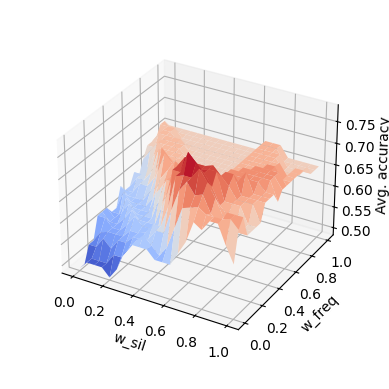

<Figure size 1000x1000 with 0 Axes>

In [93]:
import matplotlib.pyplot as plt

def plot_3D_accuracy(config=[1.0, 0, 0.0, 0], steps=0.05):
    # Create grid for the 3rd and 4th parameters in the config
    param3_range = np.arange(0, 1.05, steps)
    param4_range = np.arange(0, 1.05, steps)
    
    param3_grid, param4_grid = np.meshgrid(param3_range, param4_range)
    
    # Store the accuracy values
    accuracy_grid = np.zeros(param3_grid.shape)
    
    # Iterate through the parameter ranges
    for i in range(param3_grid.shape[0]):
        for j in range(param3_grid.shape[1]):
            config[2] = param3_grid[i, j]  # silhouette
            config[3] = param4_grid[i, j]  # appearances
            accuracy_grid[i, j] = -objective(config=config)
    
    # Plot the 3D graph
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig = plt.figure(figsize=(10, 10))  # Make the figure larger
    ax.plot_surface(param3_grid, param4_grid, accuracy_grid, cmap='coolwarm')
    ax.set_xlabel('w_sil')
    ax.set_ylabel('w_freq')
    ax.set_zlabel('Avg. accuracy')

    ax.set_box_aspect(None, zoom=0.85)
    
    plt.show()
    
plot_3D_accuracy()